In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

In [2]:
df = pd.read_excel("../data/insecurite_alimentaire.xlsx")

In [3]:
df.head()

,Sex,Age_CHH,S_Matri,N_Edu,Act_P,T_HH,For_Agr,N_Parc,SP_coffee,S_ppois,...,R_Niebe,R_Fruit,R_legume,R_Caffee,R_Anim,RN(Vente),RTAE,R_Vital,SDAM_Tr,SCA
0,1,81,1,1,1,5,1,1,736,NaN,...,0,0,0,66050,34400,253250,287650,3675492,1,1
1,1,61,1,2,1,5,1,2,1421,NaN,...,0,25000,0,67625,359400,130825,490225,3675492,2,1
2,1,63,1,1,1,5,1,2,3080,NaN,...,0,0,0,66050,379400,1187850,1567250,3675492,1,1
3,1,72,1,1,1,4,1,3,1500,20000.0,...,0,0,0,-40400,505000,700200,1205200,3675492,1,1
4,1,69,1,1,1,6,1,2,1030,NaN,...,0,160000,30000,32550,630000,1703550,2333550,3675492,1,2


#### 1. Summary of statistics

In [4]:
# Summary statistics for numeric columns
print(df.describe())

# Frequency counts for categorical variables
print(df['Sex'].value_counts())  # Distribution by sex
print(df['N_Edu'].value_counts())  # Education levels
print(df['S_Matri'].value_counts())  # Marital status


              Sex     Age_CHH     S_Matri       N_Edu       Act_P        T_HH  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000   
mean     1.158537   61.682927    1.250000    1.542683    1.018293    5.304878   
std      0.366362   10.913354    0.487576    0.676971    0.174179    2.321883   
min      1.000000   34.000000    1.000000    0.000000    1.000000    1.000000   
25%      1.000000   54.000000    1.000000    1.000000    1.000000    4.000000   
50%      1.000000   63.000000    1.000000    2.000000    1.000000    5.000000   
75%      1.000000   70.000000    1.000000    2.000000    1.000000    7.000000   
max      2.000000   86.000000    4.000000    3.000000    3.000000   11.000000   

          For_Agr      N_Parc     SP_coffee       S_ppois  ...        R_Niebe  \
count  164.000000  164.000000    164.000000     22.000000  ...     164.000000   
mean     0.902439    2.195122   1432.432927   8498.409091  ...    3060.975610   
std      0.297629    0.6054

#### 2. Visualize the distributions

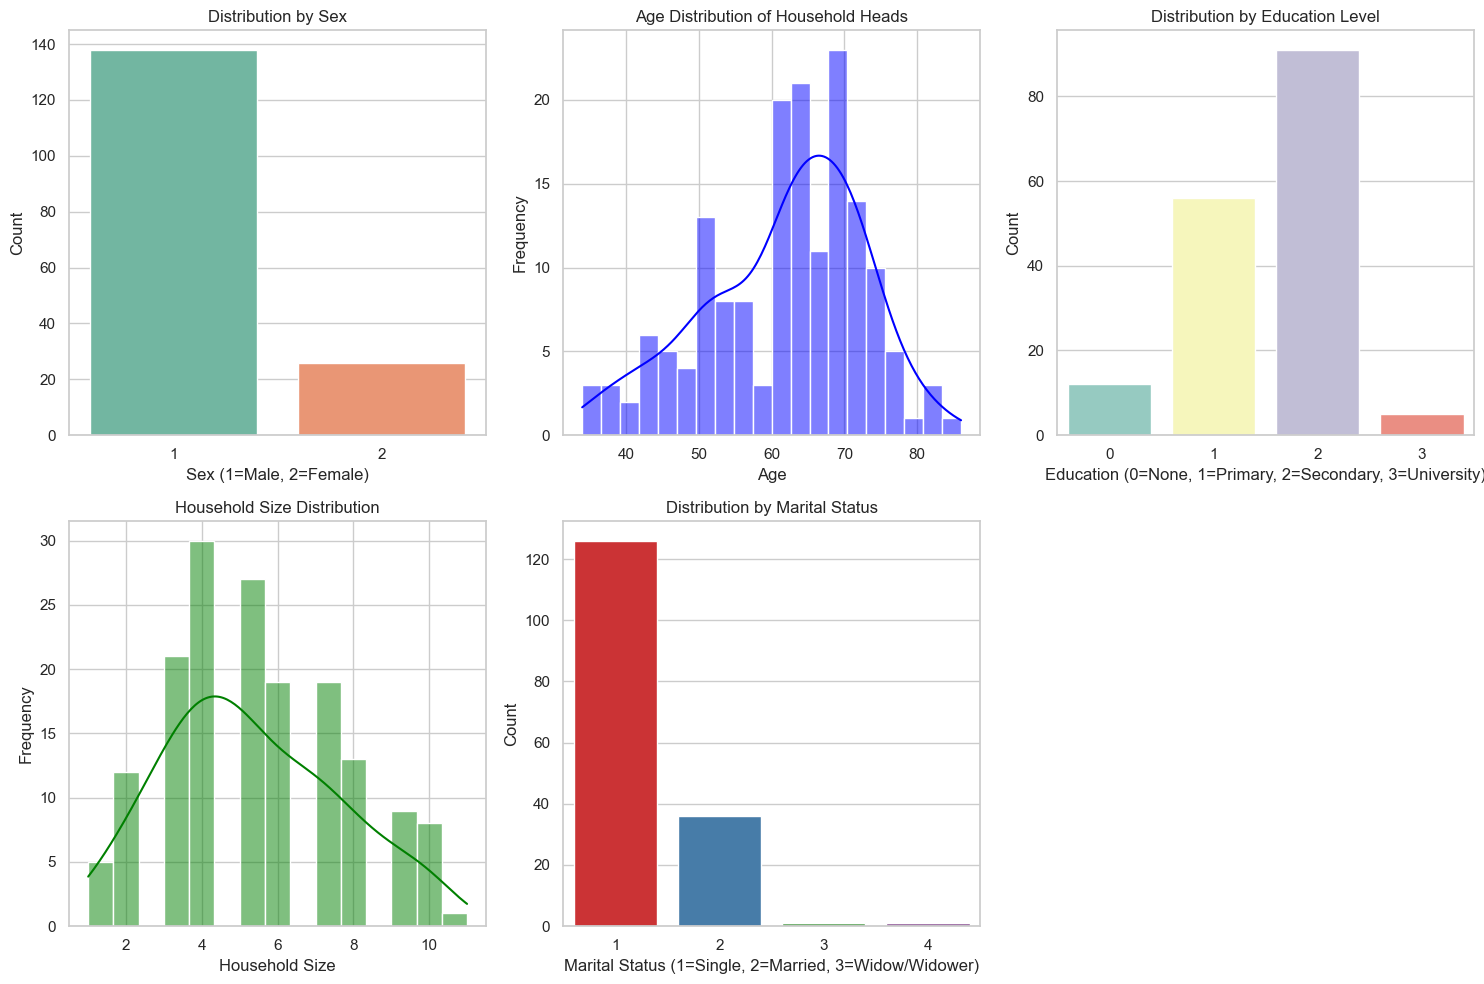

In [5]:
# Define the figure and axes for plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Distribution by Sex
sns.countplot(x='Sex', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribution by Sex')
axes[0, 0].set_xlabel('Sex (1=Male, 2=Female)')
axes[0, 0].set_ylabel('Count')

# Plot 2: Distribution by Age of Household Head
sns.histplot(df['Age_CHH'], bins=20, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Age Distribution of Household Heads')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Distribution by Education Level
sns.countplot(x='N_Edu', data=df, ax=axes[0, 2], palette='Set3')
axes[0, 2].set_title('Distribution by Education Level')
axes[0, 2].set_xlabel('Education (0=None, 1=Primary, 2=Secondary, 3=University)')
axes[0, 2].set_ylabel('Count')

# Plot 4: Distribution of Household Size (T_HH)
sns.histplot(df['T_HH'], bins=15, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Household Size Distribution')
axes[1, 0].set_xlabel('Household Size')
axes[1, 0].set_ylabel('Frequency')

# Plot 5: Distribution by Marital Status
sns.countplot(x='S_Matri', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Distribution by Marital Status')
axes[1, 1].set_xlabel('Marital Status (1=Single, 2=Married, 3=Widow/Widower)')
axes[1, 1].set_ylabel('Count')

# Remove the empty plot (axes[1, 2])
fig.delaxes(axes[1, 2])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##### Replace NaN with 0 for Specific Surface Columns

In [6]:
# List of specific surface columns to fill NaN with 0
surface_columns = ['S_Soja', 'S_Pterre', 'S_Pdouce', 'S_Manioc', 'S_archide', 
                   'S_mais', 'S_riz', 'S_sorgho', 'S_pcaja', 'S_ppois','S_Nieb', 'S_Legum']

# Replace NaN with 0 only in the specified surface columns
df[surface_columns] = df[surface_columns].fillna(0)

##### Filter Out Rows and Calculate Mean and Median for Non-Zero Surfaces

In [7]:
# Initialize an empty DataFrame to store the results
surface_area_stats = pd.DataFrame(columns=['Mean Area (m²)', 'Median Area (m²)'])

# Loop through each surface column and calculate the mean and median for values > 0
for surface in surface_columns:
    filtered_data = df[df[surface] > 0]  # Filter rows where surface area is greater than zero
    mean_value = filtered_data[surface].mean()
    median_value = filtered_data[surface].median()
    
    # Add the mean and median to the results DataFrame
    surface_area_stats.loc[surface] = [mean_value, median_value]

# Display the filtered statistics
print(surface_area_stats)

           Mean Area (m²)  Median Area (m²)
S_Soja         690.000000             230.0
S_Pterre      2659.318584             960.0
S_Pdouce      1686.385621             500.0
S_Manioc      6422.210145            4500.0
S_archide      995.000000             380.0
S_mais        8212.550000            5000.0
S_riz         1149.818182             360.0
S_sorgho       138.333333              90.0
S_pcaja       2140.363636             900.0
S_ppois       8498.409091            5350.0
S_Nieb        1556.000000             420.0
S_Legum        470.421053             100.0


##### Visualize the Results

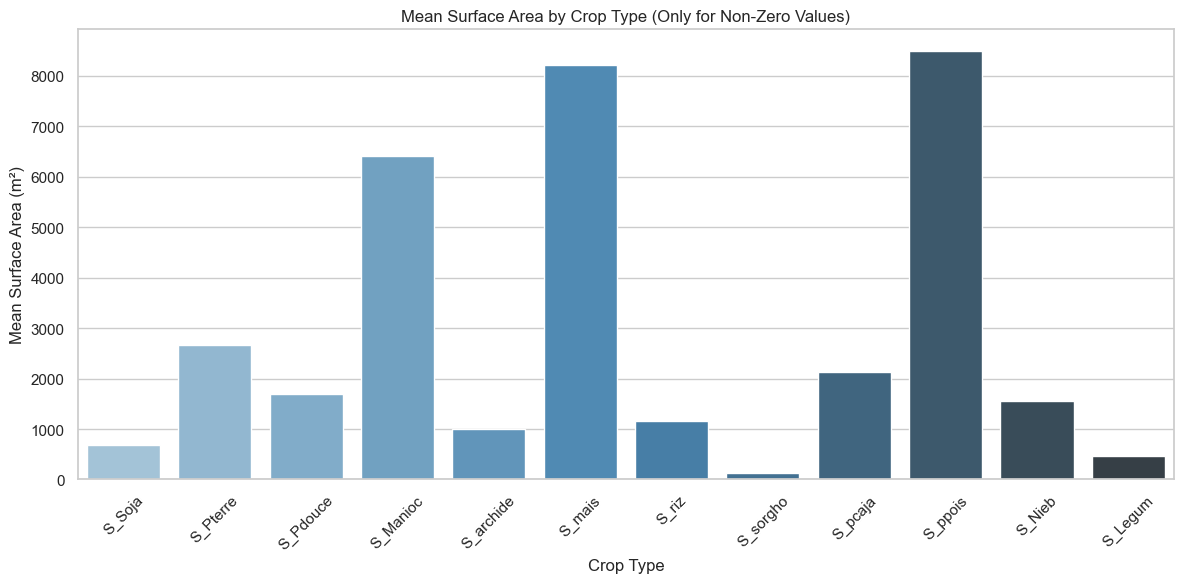

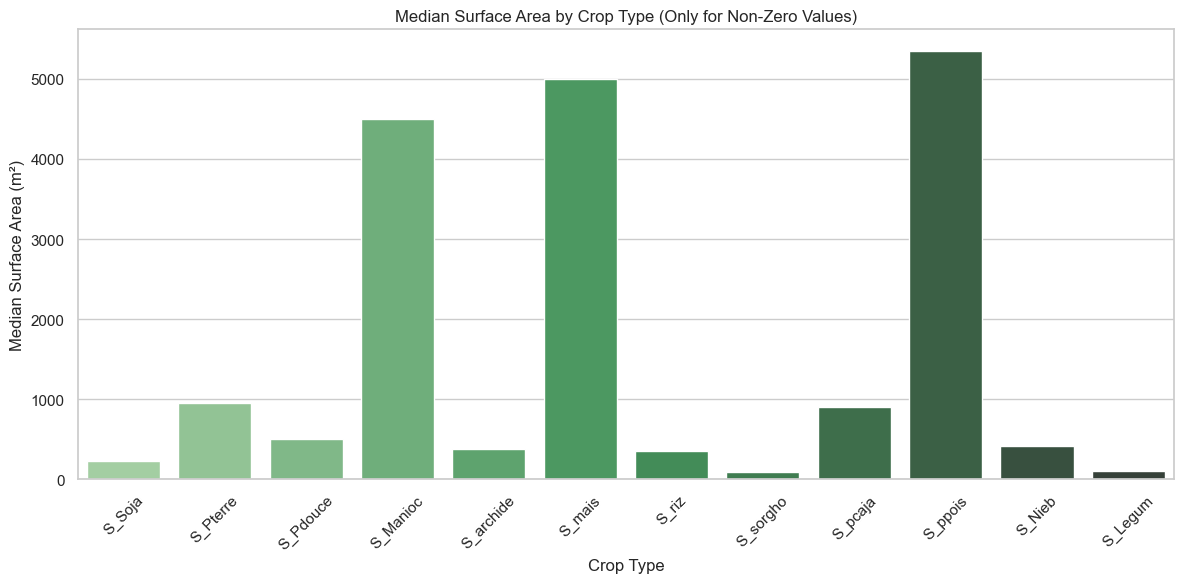

In [9]:
# Plotting the Mean Area for each surface
plt.figure(figsize=(12, 6))
sns.barplot(x=surface_area_stats.index, y=surface_area_stats['Mean Area (m²)'], palette="Blues_d")
plt.title('Mean Surface Area by Crop Type (Only for Non-Zero Values)')
plt.xlabel('Crop Type')
plt.ylabel('Mean Surface Area (m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Median Area for each surface
plt.figure(figsize=(12, 6))
sns.barplot(x=surface_area_stats.index, y=surface_area_stats['Median Area (m²)'], palette="Greens_d")
plt.title('Median Surface Area by Crop Type (Only for Non-Zero Values)')
plt.xlabel('Crop Type')
plt.ylabel('Median Surface Area (m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
df[df["Act_P"]>1]

,Sex,Age_CHH,S_Matri,N_Edu,Act_P,T_HH,For_Agr,N_Parc,SP_coffee,S_ppois,...,R_Niebe,R_Fruit,R_legume,R_Caffee,R_Anim,RN(Vente),RTAE,R_Vital,SDAM_Tr,SCA
102,1,35,1,3,3,8,1,1,2175,480.0,...,0,120000,0,58000,30000,-102480,-72480,3675492,1,1
150,1,70,1,3,2,4,1,2,3500,0.0,...,0,160000,30000,262000,494400,2395800,2890200,3675492,1,1


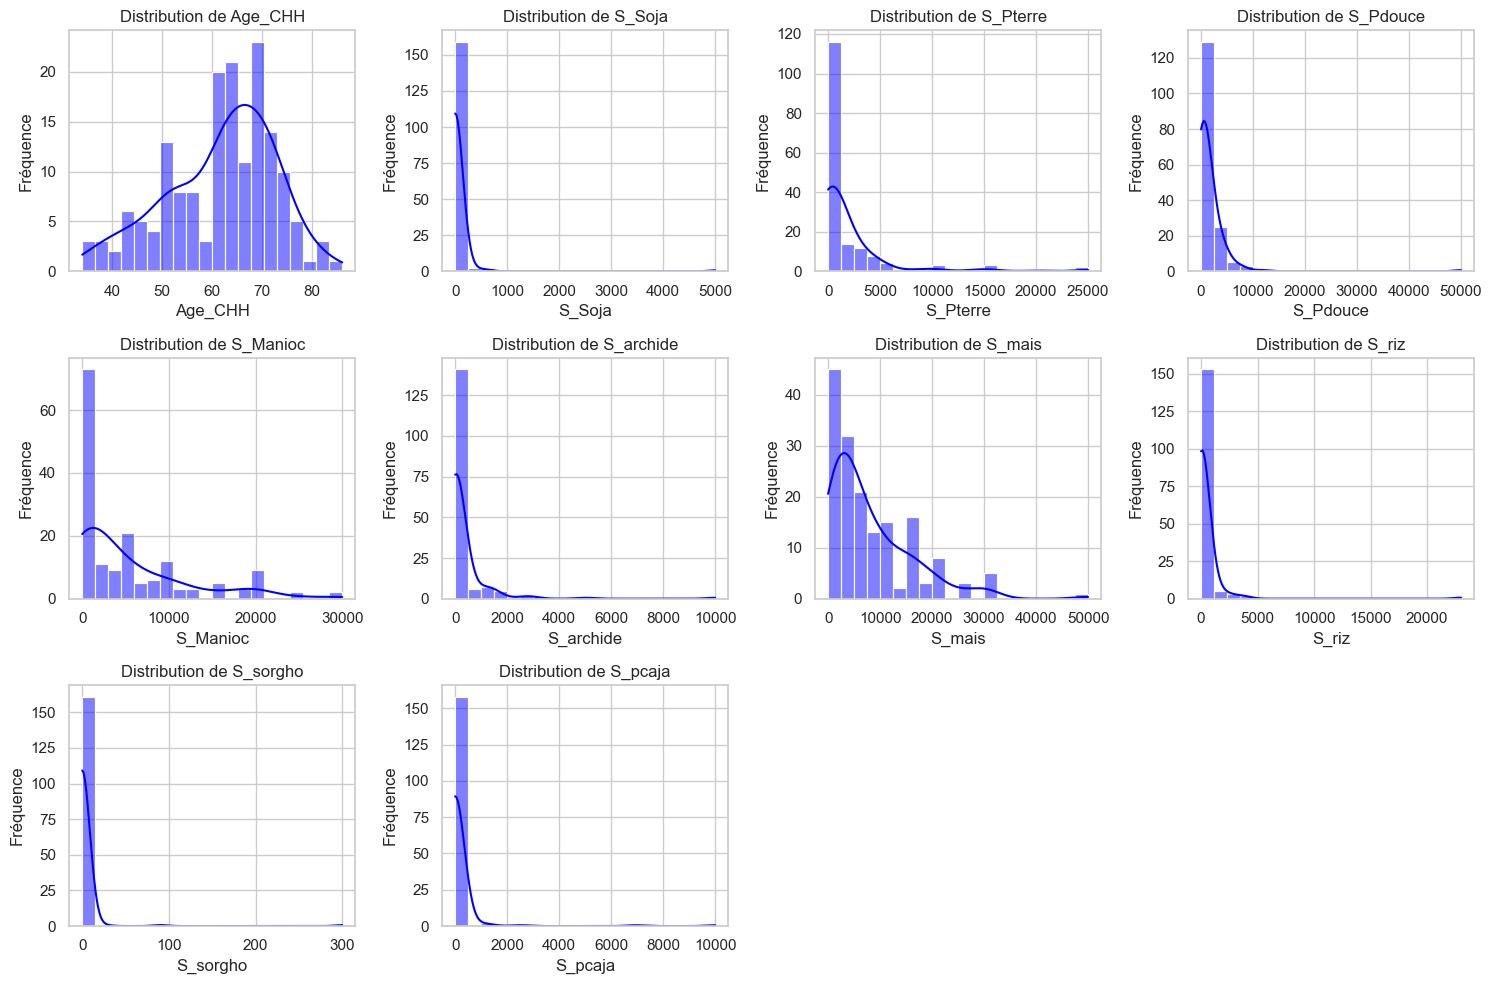

In [10]:
# Define a list of continuous variables for which we want to plot histograms
continuous_variables = ['Age_CHH', 'S_Soja', 'S_Pterre', 'S_Pdouce', 'S_Manioc', 'S_archide', 
                        'S_mais', 'S_riz', 'S_sorgho', 'S_pcaja']

# Create histograms for each continuous variable
plt.figure(figsize=(15, 10))

# Loop through each variable and create a histogram
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns for subplots
    sns.histplot(df[var], bins=20, kde=True, color='blue')  # kde=True to include density curve
    plt.title(f'Distribution de {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

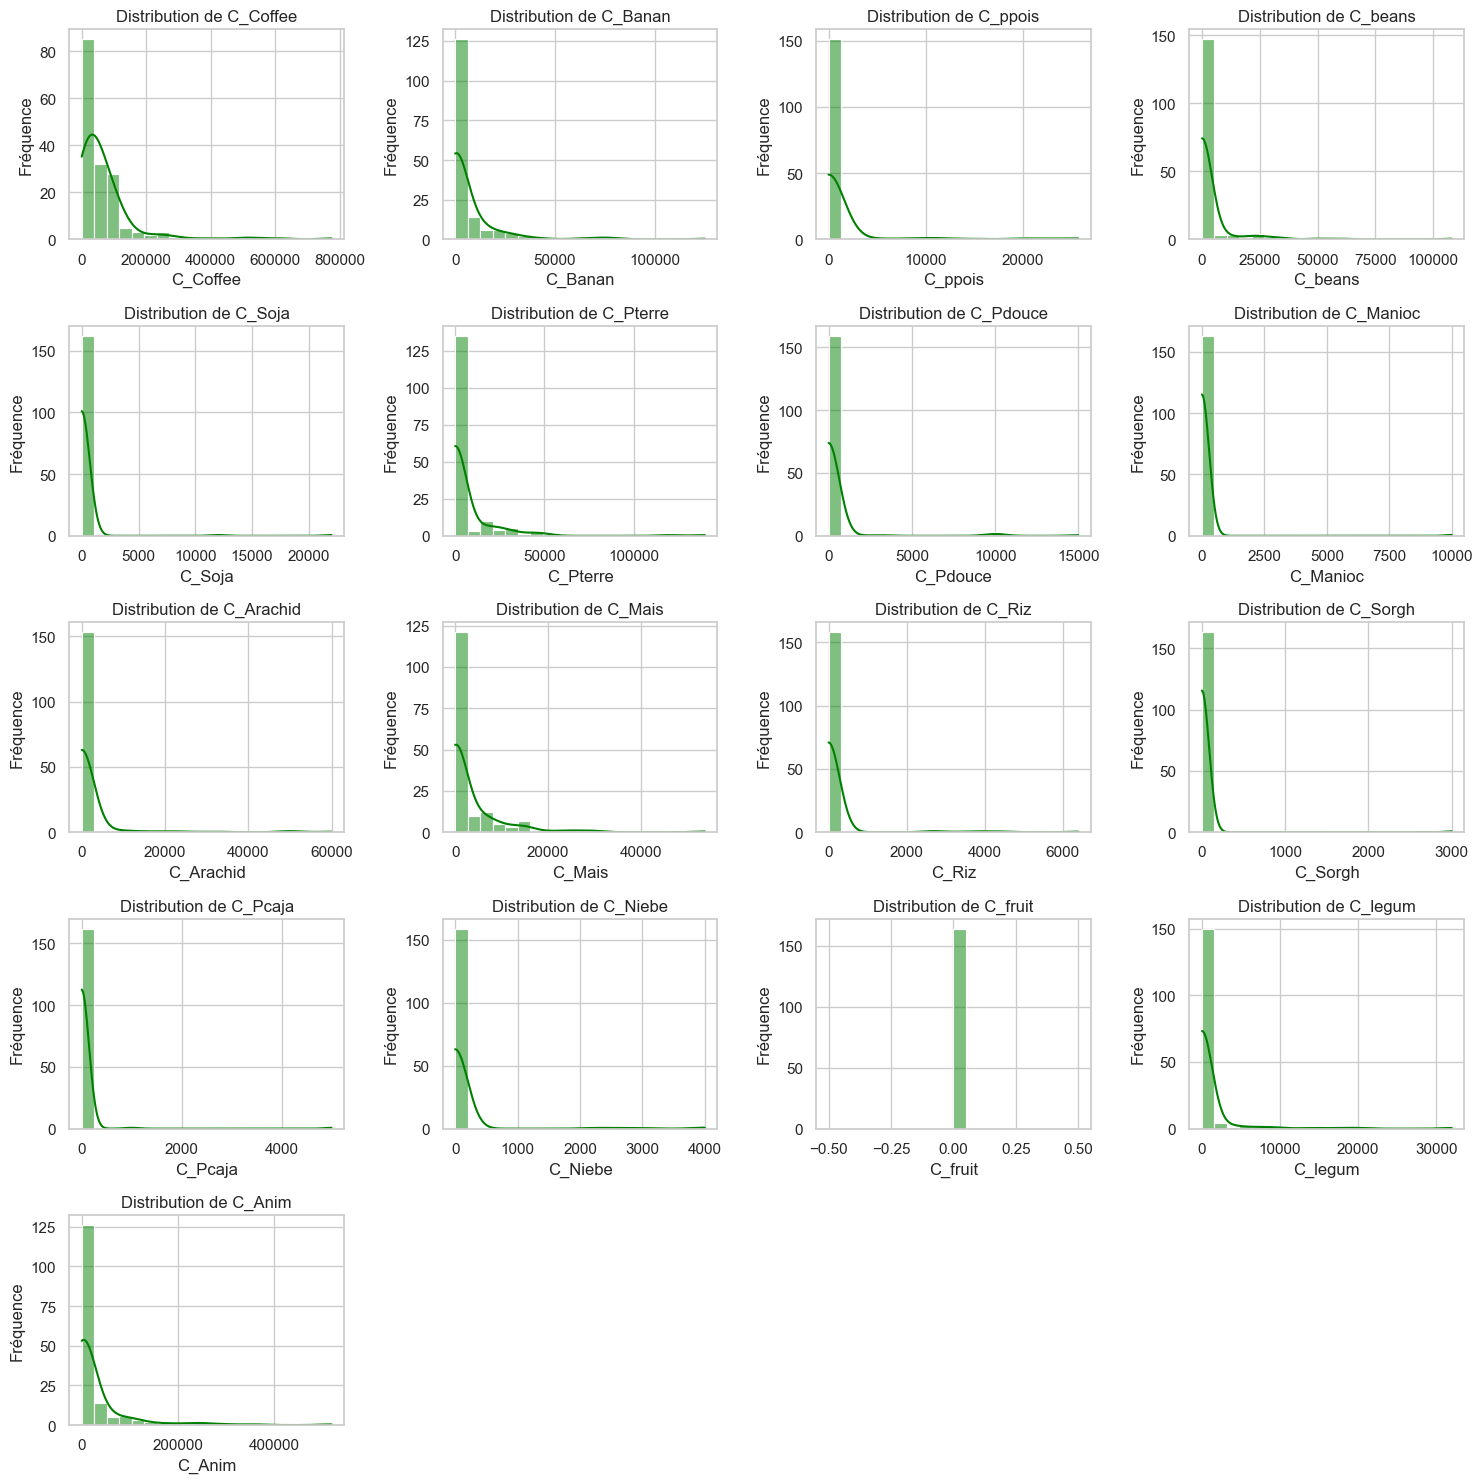

In [11]:
# Liste des variables des coûts de production
cost_variables = ['C_Coffee', 'C_Banan', 'C_ppois', 'C_beans', 'C_Soja', 
                  'C_Pterre', 'C_Pdouce', 'C_Manioc', 'C_Arachid', 'C_Mais', 
                  'C_Riz', 'C_Sorgh', 'C_Pcaja', 'C_Niebe', 'C_fruit', 'C_legum', 'C_Anim']

# Créer des histogrammes pour chaque variable de coût
plt.figure(figsize=(15, 15))

# Ajuster à 5 lignes et 4 colonnes pour 17 variables
for i, var in enumerate(cost_variables, 1):
    plt.subplot(5, 4, i)  # 5 lignes, 4 colonnes
    sns.histplot(df[var], bins=20, kde=True, color='green')  # kde=True pour inclure la courbe de densité
    plt.title(f'Distribution de {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

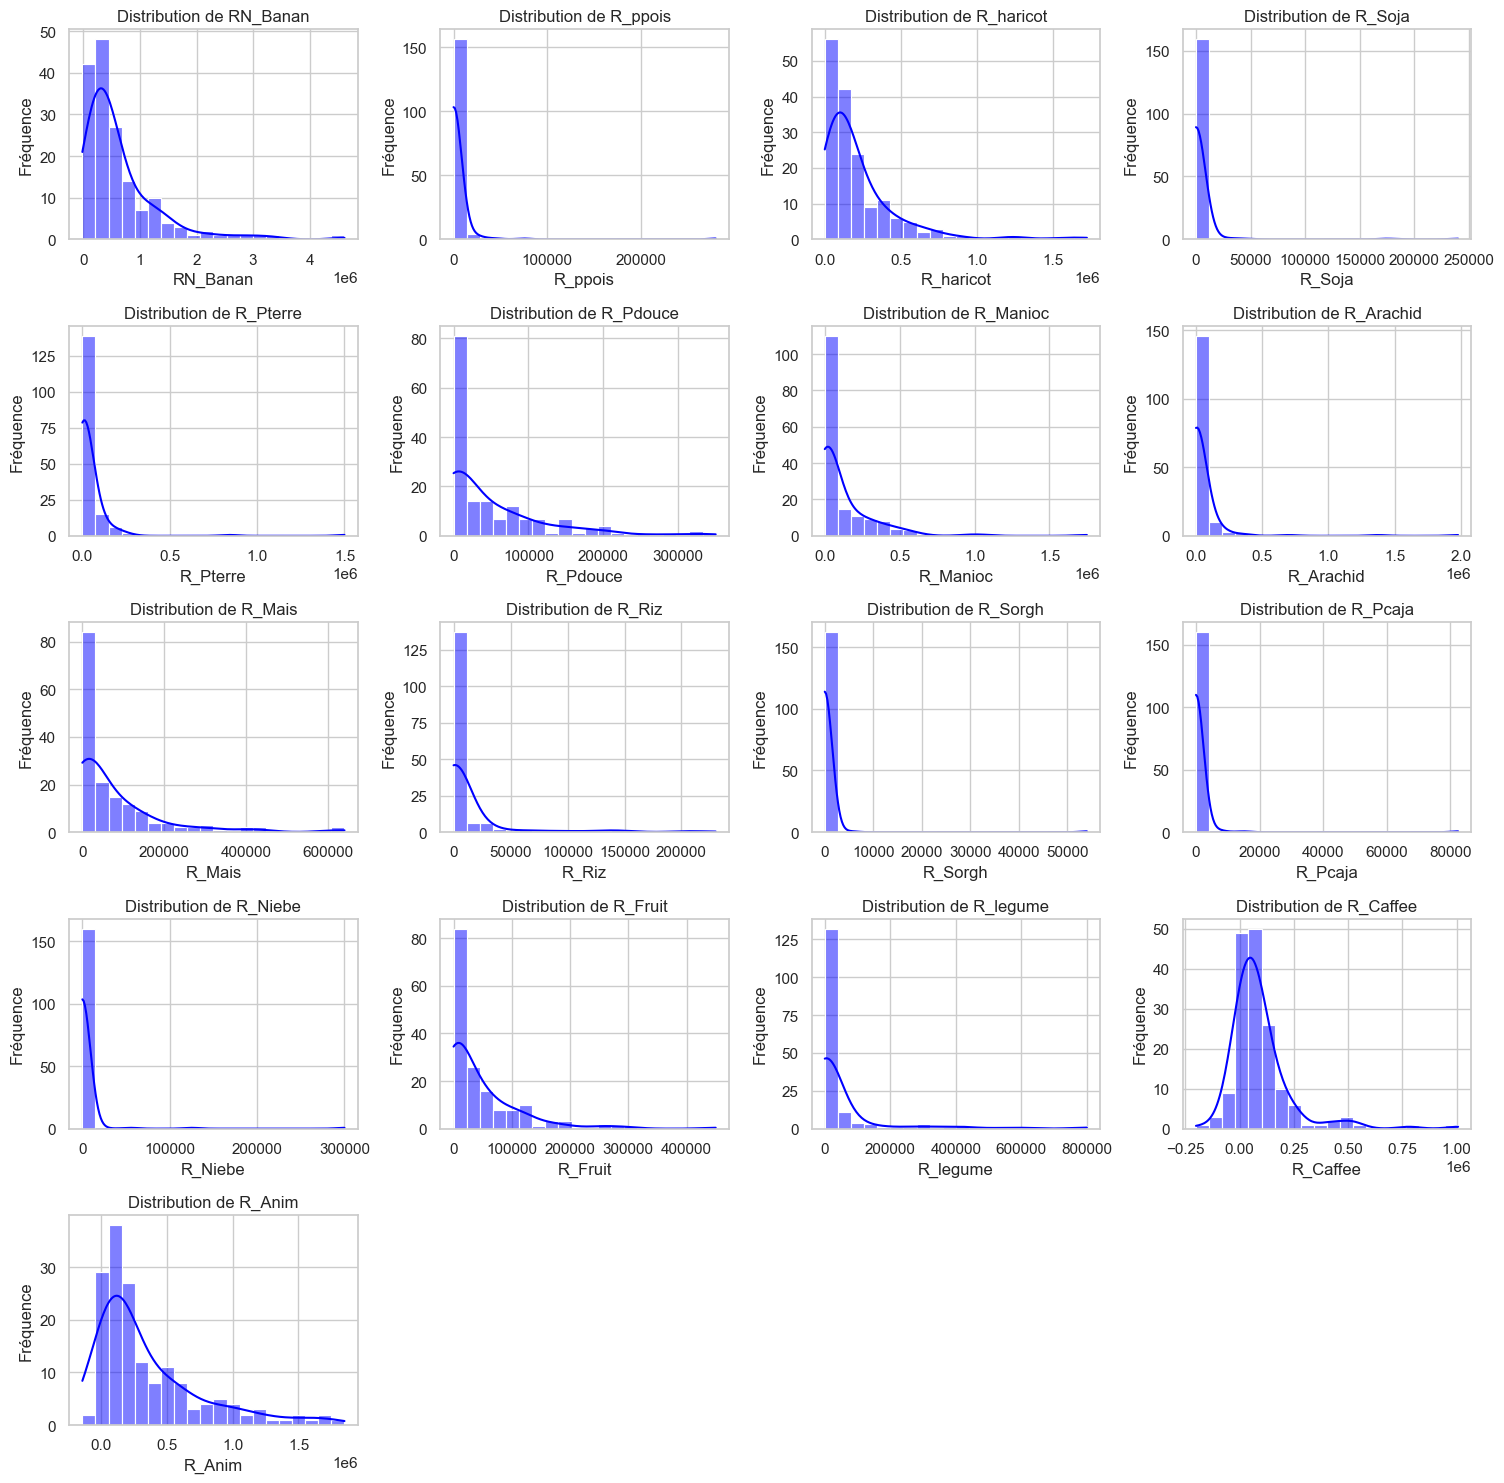

In [61]:
revenue_variables = ['RN_Banan', 'R_ppois', 'R_haricot', 'R_Soja', 'R_Pterre', 
                     'R_Pdouce', 'R_Manioc', 'R_Arachid', 'R_Mais', 'R_Riz', 
                     'R_Sorgh', 'R_Pcaja', 'R_Niebe', 'R_Fruit', 'R_legume', 
                     'R_Caffee', 'R_Anim']

# Créer des histogrammes pour chaque variable de revenu
plt.figure(figsize=(15, 15))

# Ajuster à 5 lignes et 4 colonnes pour afficher les 17 variables
for i, var in enumerate(revenue_variables, 1):
    plt.subplot(5, 4, i)  # 5 lignes, 4 colonnes
    sns.histplot(df[var], bins=20, kde=True, color='blue')  # kde=True pour inclure la courbe de densité
    plt.title(f'Distribution de {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

#### boxplots des coûts de production et des revenus nets

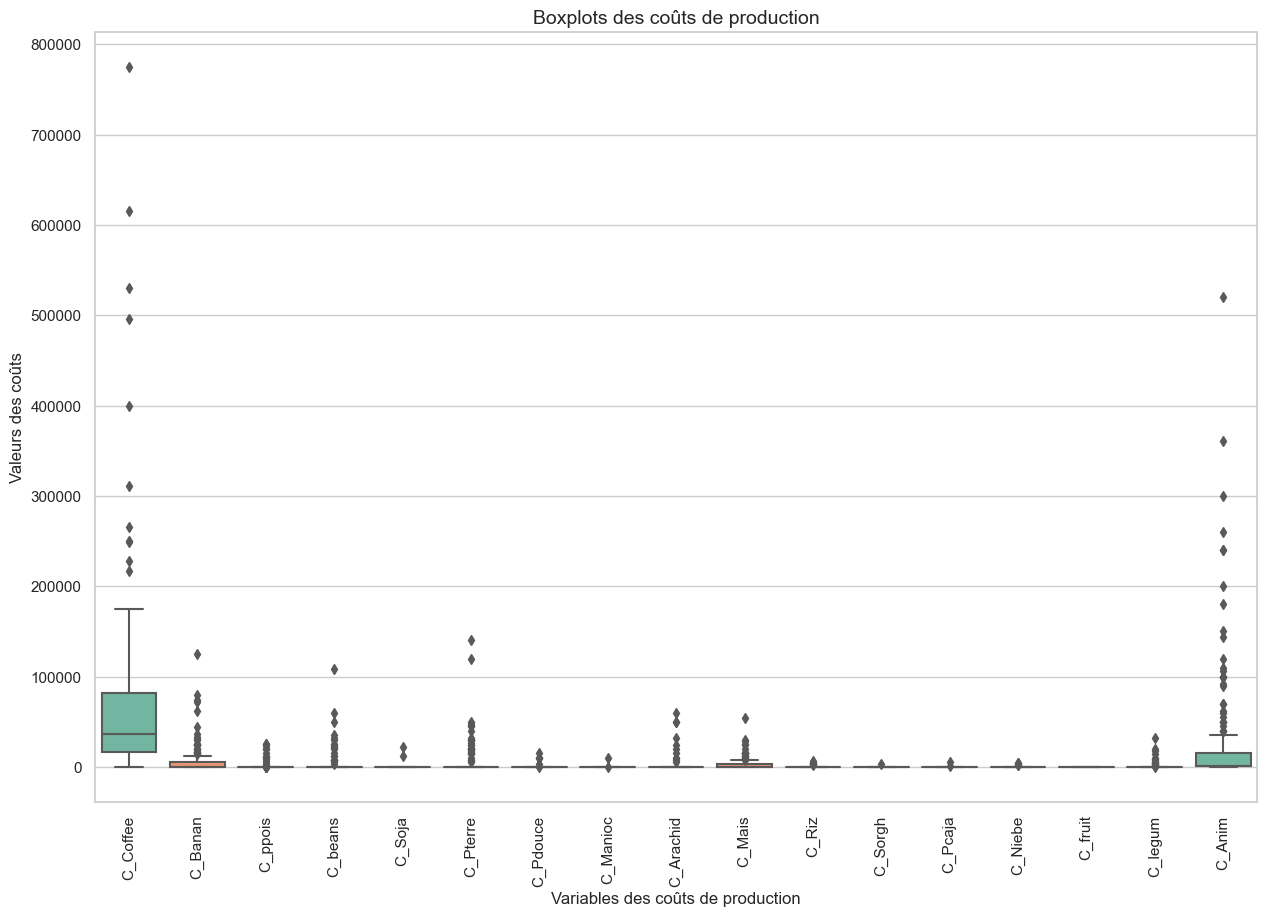

In [62]:
# Liste des variables des coûts de production
cost_variables = ['C_Coffee', 'C_Banan', 'C_ppois', 'C_beans', 'C_Soja', 
                  'C_Pterre', 'C_Pdouce', 'C_Manioc', 'C_Arachid', 'C_Mais', 
                  'C_Riz', 'C_Sorgh', 'C_Pcaja', 'C_Niebe', 'C_fruit', 
                  'C_legum', 'C_Anim']

# Créer des boxplots pour les coûts de production
plt.figure(figsize=(15, 10))

# Utiliser un seul boxplot pour afficher toutes les variables de coûts
sns.boxplot(data=df[cost_variables], palette="Set2")
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Boxplots des coûts de production', fontsize=14)
plt.xlabel('Variables des coûts de production')
plt.ylabel('Valeurs des coûts')
plt.show()


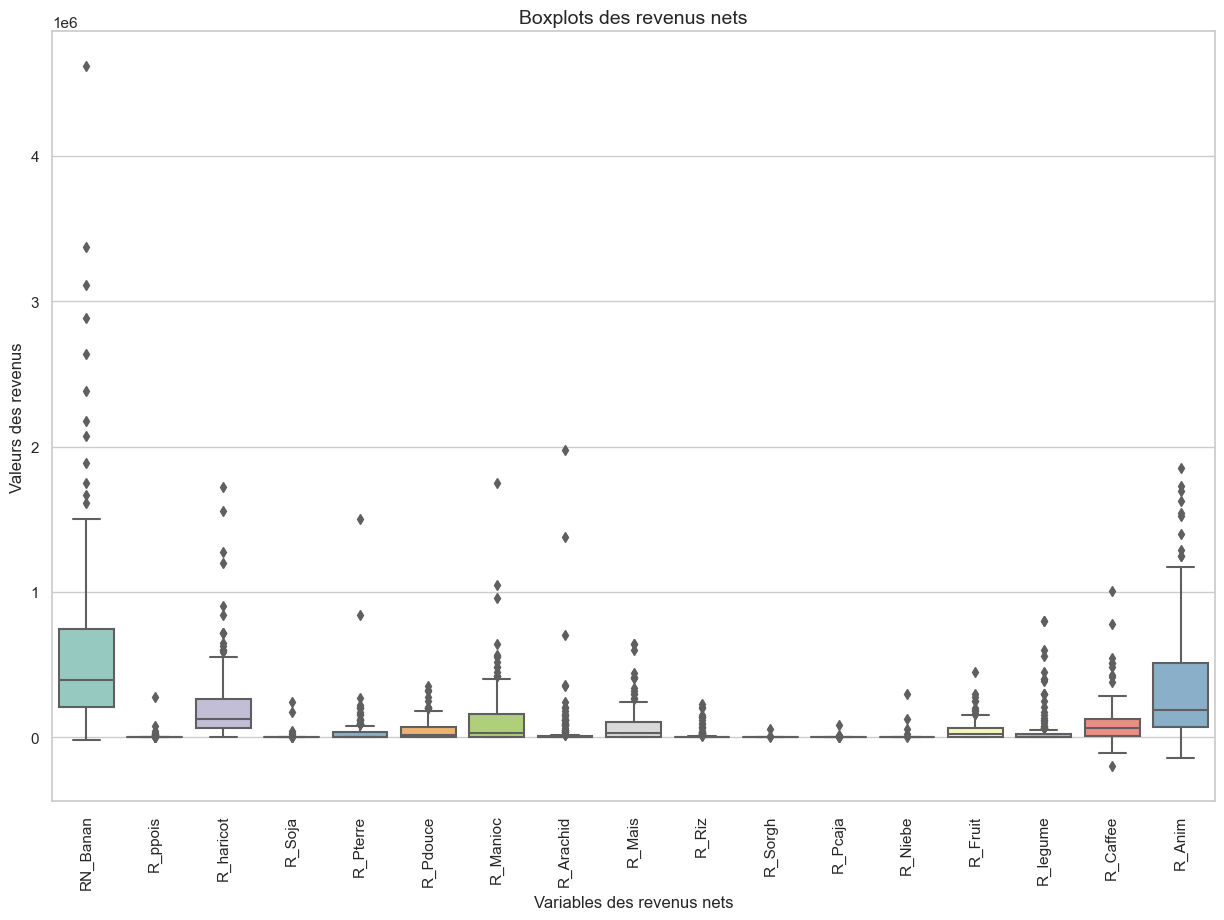

In [63]:
# Liste des variables des revenus nets
revenue_variables = ['RN_Banan', 'R_ppois', 'R_haricot', 'R_Soja', 'R_Pterre', 
                     'R_Pdouce', 'R_Manioc', 'R_Arachid', 'R_Mais', 'R_Riz', 
                     'R_Sorgh', 'R_Pcaja', 'R_Niebe', 'R_Fruit', 'R_legume', 
                     'R_Caffee', 'R_Anim']

# Créer des boxplots pour les revenus nets
plt.figure(figsize=(15, 10))

# Utiliser un seul boxplot pour afficher toutes les variables de revenus
sns.boxplot(data=df[revenue_variables], palette="Set3")
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Boxplots des revenus nets', fontsize=14)
plt.xlabel('Variables des revenus nets')
plt.ylabel('Valeurs des revenus')
plt.show()


#### Graphiques en secteurs pour chaque type de culture :

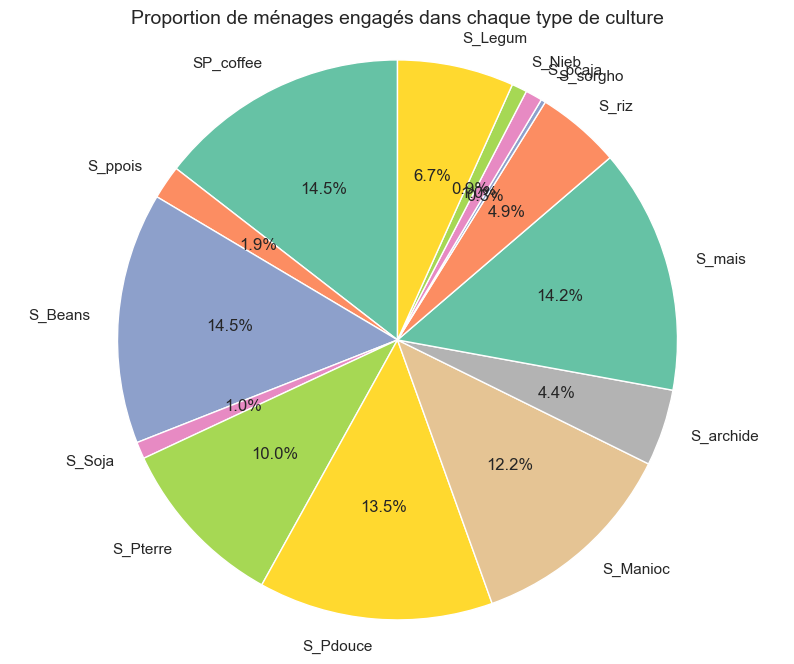

In [64]:
# Liste des variables de superficies des cultures
crop_variables = ['SP_coffee', 'S_ppois', 'S_Beans', 'S_Soja', 'S_Pterre', 
                  'S_Pdouce', 'S_Manioc', 'S_archide', 'S_mais', 
                  'S_riz', 'S_sorgho', 'S_pcaja', 'S_Nieb', 'S_Legum']

# Calculer la proportion de ménages engagés dans chaque type de culture
cultures_presentes = (df[crop_variables] > 0).sum()

# Créer un graphique en secteurs
plt.figure(figsize=(10, 8))
plt.pie(cultures_presentes, labels=cultures_presentes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Proportion de ménages engagés dans chaque type de culture', fontsize=14)
plt.axis('equal')  # Assure que le graphique est circulaire
plt.show()


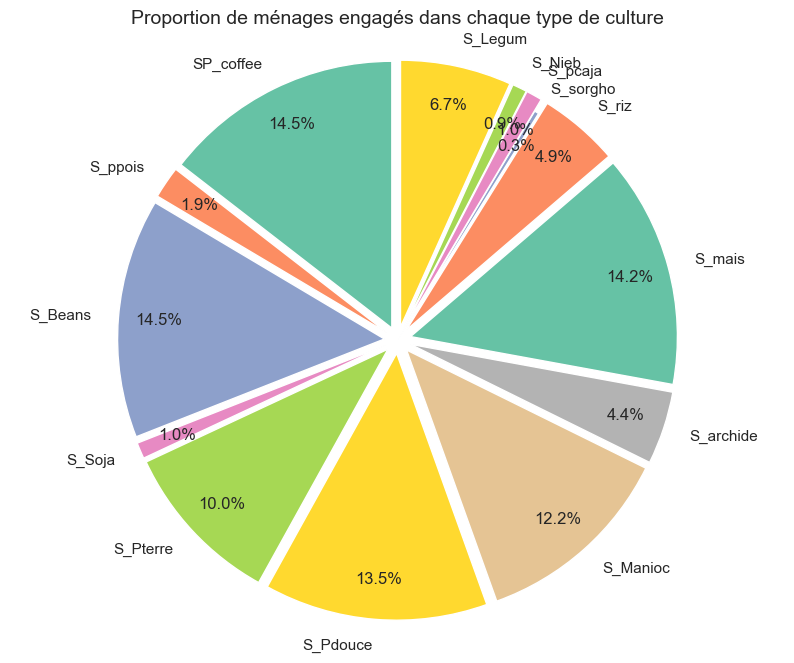

In [65]:

# List of crop variables (superficies)
crop_variables = ['SP_coffee', 'S_ppois', 'S_Beans', 'S_Soja', 'S_Pterre', 
                  'S_Pdouce', 'S_Manioc', 'S_archide', 'S_mais', 
                  'S_riz', 'S_sorgho', 'S_pcaja', 'S_Nieb', 'S_Legum']

# Calculate the number of households involved in each type of crop
cultures_presentes = (df[crop_variables] > 0).sum()

# Define explosion values for each slice (set to 0 for no explosion, >0 to move out slices)
explode = [0.05 if val > 5 else 0 for val in cultures_presentes]  # Slight explosion for some slices

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(cultures_presentes, labels=cultures_presentes.index, autopct='%1.1f%%', 
        explode=explode, startangle=90, colors=sns.color_palette("Set2"), 
        pctdistance=0.85, labeldistance=1.1)  # Adjust labeldistance and pctdistance for better spacing

# Add a legend to display crop names and percentages more clearly
#plt.legend(cultures_presentes.index, title="Types de culture", loc="best")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add title
plt.title('Proportion de ménages engagés dans chaque type de culture', fontsize=14)

# Display the plot
plt.show()


['Sex', 'Age_CHH', 'S_Matri', 'N_Edu', 'Act_P', 'T_HH', 'For_Agr', 'N_Parc', 'SP_coffee', 'S_ppois', 'S_Beans', 'S_Soja', 'S_Pterre', 'S_Pdouce', 'S_Manioc', 'S_archide', 'S_mais', 'S_riz', 'S_sorgho', 'S_pcaja', 'S_Nieb', 'S_Legum', 'SPTm_m2', 'C_Coffee', 'C_Banan', 'C_ppois', 'C_beans', 'C_Soja', 'C_Pterre', 'C_Pdouce', 'C_Manioc', 'C_Arachid', 'C_Mais', 'C_Riz', 'C_Sorgh', 'C_Pcaja', 'C_Niebe', 'C_fruit', 'C_legum', 'C_Anim', 'RN_Banan', 'R_ppois', 'R_haricot', 'R_Soja', 'R_Pterre', 'R_Pdouce', 'R_Colocaz', 'R_Manioc', 'R_Arachid', 'R_Mais', 'R_Riz', 'R_Sorgh', 'R_Pcaja', 'R_Niebe', 'R_Fruit', 'R_legume', 'R_Caffee', 'R_Anim', 'RN(Vente)', 'RTAE', 'R_Vital', 'SDAM_Tr', 'SCA']


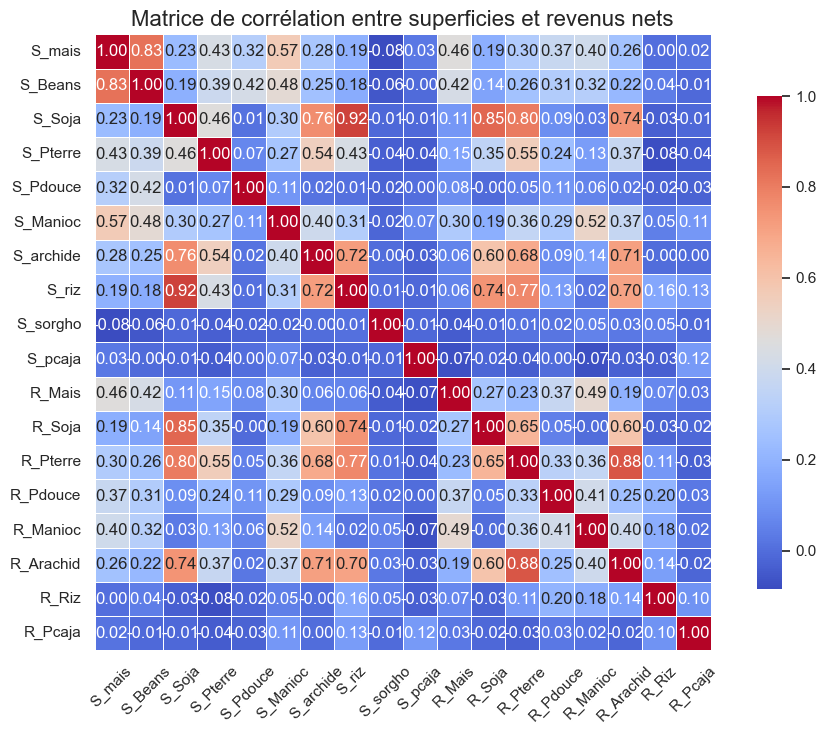

In [66]:
# Check available columns
print(df.columns.tolist())

# Define crop area and revenue variables based on available columns
crop_area_variables = ['S_mais', 'S_Beans', 'S_Soja', 'S_Pterre', 
                       'S_Pdouce', 'S_Manioc', 'S_archide', 
                       'S_riz', 'S_sorgho', 'S_pcaja']

# Modify this list based on available revenue columns
revenue_variables = ['R_Mais', 'R_Beans', 'R_Soja', 'R_Pterre', 
                     'R_Pdouce', 'R_Manioc', 'R_Arachid', 
                     'R_Riz', 'R_Sorgho', 'R_Pcaja']

# Filter revenue variables to only include those present in the DataFrame
revenue_variables = [var for var in revenue_variables if var in df.columns]

# Create a new DataFrame with only the relevant columns
correlation_data = df[crop_area_variables + revenue_variables]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Matrice de corrélation entre superficies et revenus nets', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


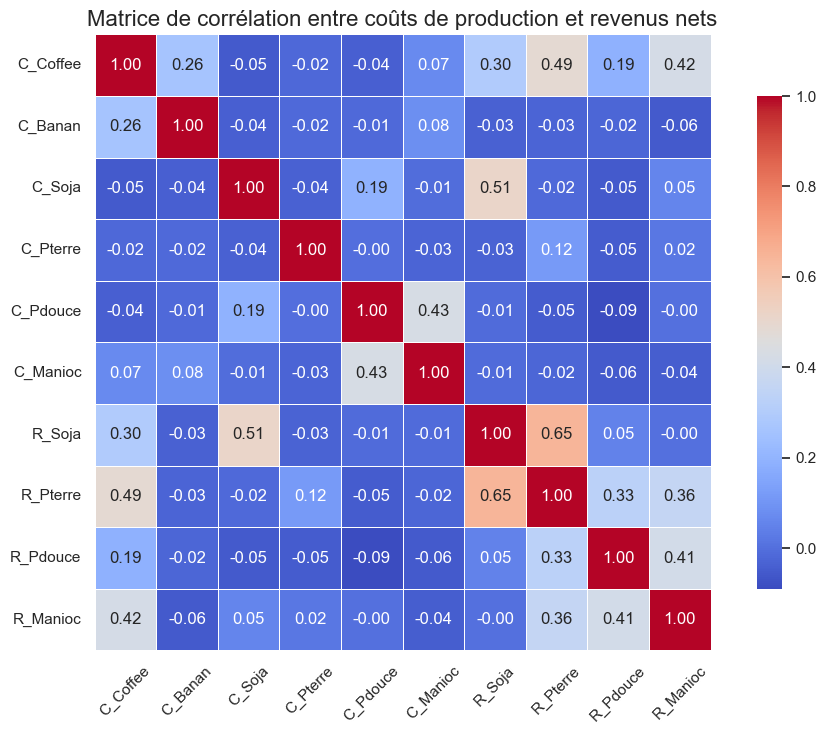

In [67]:
# Define production cost and revenue variables
cost_variables = ['C_Coffee', 'C_Banan', 'C_Beans', 'C_Soja', 
                  'C_Pterre', 'C_Pdouce', 'C_Manioc', 
                  'C_archide', 'C_riz', 'C_sorgho']

# Corresponding revenue variables
revenue_variables = ['R_Coffee', 'R_Banan', 'R_Beans', 'R_Soja', 
                     'R_Pterre', 'R_Pdouce', 'R_Manioc', 
                     'R_archide', 'R_riz', 'R_Sorgho']

# Filter cost and revenue variables to only include those present in the DataFrame
cost_variables = [var for var in cost_variables if var in df.columns]
revenue_variables = [var for var in revenue_variables if var in df.columns]

# Create a new DataFrame with only the relevant columns
correlation_data = df[cost_variables + revenue_variables]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Matrice de corrélation entre coûts de production et revenus nets', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

       Crop    Revenue      Cost  Net Profit  Profit Margin (%)
9    Fruits    7316500         0     7316500           1.000000
0    Coffee   15076687  11403063     3673624          32.216116
10   Pterre    6799200    945000     5854200         619.492063
8    Animal   58520004   4677250    53842754        1151.162628
7      Soja     539600     34000      505600        1487.058824
5    Sorgho      61200      3000       58200        1940.000000
2     Maize   12450700    496588    11954112        2407.249470
14  Archide    7625900    283500     7342400        2589.911817
4     Niebe     502000     15700      486300        3097.452229
11  Legumes    7596500    137000     7459500        5444.890511
1     Beans   36085000    499300    35585700        7127.117965
3      Rice    2161950     23900     2138050        8945.815900
6    Banana  102312350   1040600   101271750        9732.053623
12   Pdouce    8104000     48008     8055992       16780.519913
13   Manioc   19715500     10250    1970

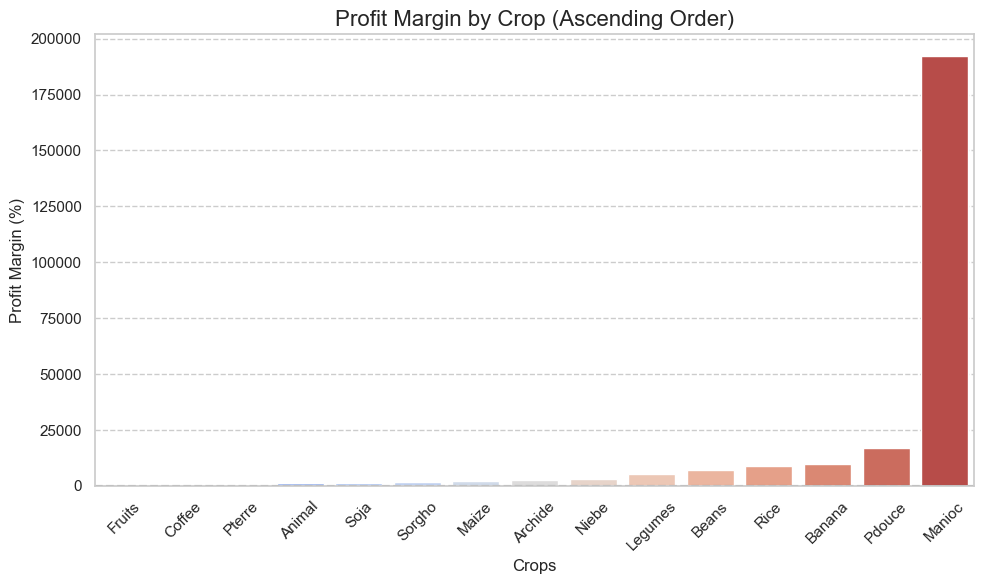

In [13]:
crop_columns = {
    'Coffee': ['R_Caffee', 'C_Coffee'],
    'Beans': ['R_haricot', 'C_beans'],
    'Maize': ['R_Mais', 'C_Mais'],
    'Rice': ['R_Riz', 'C_Riz'],
    'Niebe': ['R_Niebe', 'C_Niebe'],
    'Sorgho': ['R_Sorgh', 'C_Sorgh'],
    'Banana': ['RN_Banan', 'C_Banan'],
    'Soja': ['R_Soja', 'C_Soja'],
    'Animal': ['R_Anim', 'C_Anim'],
    'Fruits':['R_Fruit', 'C_fruit'],
    'Pterre': ['R_Pterre', 'C_Pterre'],
    'Legumes':['R_legume', 'C_legum'],
    'Pdouce': ['R_Pdouce', 'C_Pdouce'],
    'Manioc': ['R_Manioc', 'C_Manioc'],
    'Archide': ['R_Arachid', 'C_Arachid']
}

# Step 1: Calculate Net Profit and Profit Margin
profit_data = []

for crop, (revenue_col, cost_col) in crop_columns.items():
    revenue = df[revenue_col].sum() if revenue_col in df.columns else 0
    cost = df[cost_col].sum() if cost_col in df.columns else 0
    net_profit = revenue - cost
    profit_margin = (net_profit / revenue) * 100 if revenue > 0 else 0  # Avoid division by zero
    profit_data.append({
        'Crop': crop,
        'Revenue': revenue,
        'Cost': cost,
        'Net Profit': net_profit,
        'Profit Margin (%)': profit_margin
    })

# Step 2: Create a DataFrame
profit_df = pd.DataFrame(profit_data)

# Step 3: Sort the DataFrame by Profit Margin in ascending order
profit_df.sort_values(by='Profit Margin (%)', ascending=True, inplace=True)

# Step 4: Display the results in a formatted table
print(profit_df)

# Step 5: Plotting Profit Margins
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_df, x='Crop', y='Profit Margin (%)', palette='coolwarm')
plt.title('Profit Margin by Crop (Ascending Order)', fontsize=16)
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')  # Add a line for zero profit margin
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

       Crop   Mean Revenue     Mean Cost     Net Profit  \
9    Fruits   44612.804878      0.000000   44612.804878   
0    Coffee   91931.018293  69530.871951   22400.146341   
10   Pterre   41458.536585   5762.195122   35696.341463   
8    Animal  356829.292683  28519.817073  328309.475610   
7      Soja    3290.243902    207.317073    3082.926829   
5    Sorgho     373.170732     18.292683     354.878049   
2     Maize   75918.902439   3027.975610   72890.926829   
14  Archide   46499.390244   1728.658537   44770.731707   
4     Niebe    3060.975610     95.731707    2965.243902   
11  Legumes   46320.121951    835.365854   45484.756098   
1     Beans  220030.487805   3044.512195  216985.975610   
3      Rice   13182.621951    145.731707   13036.890244   
6    Banana  623855.792683   6345.121951  617510.670732   
12   Pdouce   49414.634146    292.731707   49121.902439   
13   Manioc  120216.463415     62.500000  120153.963415   

    Profit Margin (%) (relative to Cost)  
9           

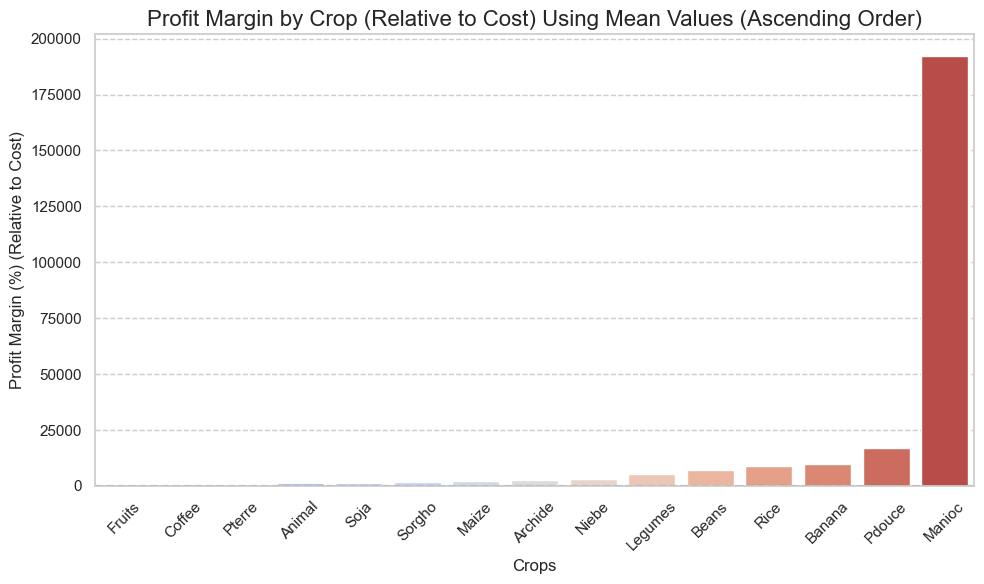

In [14]:
crop_columns = {
    'Coffee': ['R_Caffee', 'C_Coffee'],
    'Beans': ['R_haricot', 'C_beans'],
    'Maize': ['R_Mais', 'C_Mais'],
    'Rice': ['R_Riz', 'C_Riz'],
    'Niebe': ['R_Niebe', 'C_Niebe'],
    'Sorgho': ['R_Sorgh', 'C_Sorgh'],
    'Banana': ['RN_Banan', 'C_Banan'],
    'Soja': ['R_Soja', 'C_Soja'],
    'Animal': ['R_Anim', 'C_Anim'],
    'Fruits': ['R_Fruit', 'C_fruit'],
    'Pterre': ['R_Pterre', 'C_Pterre'],
    'Legumes': ['R_legume', 'C_legum'],
    'Pdouce': ['R_Pdouce', 'C_Pdouce'],
    'Manioc': ['R_Manioc', 'C_Manioc'],
    'Archide': ['R_Arachid', 'C_Arachid']
}

# Step 1: Calculate mean values for revenue, cost, and profit margin relative to cost
profit_data = []

for crop, (revenue_col, cost_col) in crop_columns.items():
    # Calculate mean revenue and cost for each crop
    mean_revenue = df[revenue_col].mean() if revenue_col in df.columns else 0
    mean_cost = df[cost_col].mean() if cost_col in df.columns else 0
    # Calculate net profit as the difference between mean revenue and cost
    net_profit = mean_revenue - mean_cost
    # Profit Margin as a percentage relative to the cost
    profit_margin = (net_profit / mean_cost) * 100 if mean_cost > 0 else 0  # Avoid division by zero
    
    profit_data.append({
        'Crop': crop,
        'Mean Revenue': mean_revenue,
        'Mean Cost': mean_cost,
        'Net Profit': net_profit,
        'Profit Margin (%) (relative to Cost)': profit_margin
    })

# Step 2: Create a DataFrame
profit_df = pd.DataFrame(profit_data)

# Step 3: Sort the DataFrame by Profit Margin relative to cost in ascending order
profit_df.sort_values(by='Profit Margin (%) (relative to Cost)', ascending=True, inplace=True)

# Step 4: Display the results in a formatted table
print(profit_df)

# Step 5: Plotting Profit Margins relative to cost (based on mean values)
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_df, x='Crop', y='Profit Margin (%) (relative to Cost)', palette='coolwarm')
plt.title('Profit Margin by Crop (Relative to Cost) Using Mean Values (Ascending Order)', fontsize=16)
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Profit Margin (%) (Relative to Cost)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')  # Add a line for zero profit margin
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

       Crop   Mean Revenue     Mean Cost     Net Profit  \
0    Coffee   91931.018293  69530.871951   22400.146341   
10   Pterre   41458.536585   5762.195122   35696.341463   
8    Animal  356829.292683  28519.817073  328309.475610   
7      Soja    3290.243902    207.317073    3082.926829   
5    Sorgho     373.170732     18.292683     354.878049   
2     Maize   75918.902439   3027.975610   72890.926829   
14  Archide   46499.390244   1728.658537   44770.731707   
4     Niebe    3060.975610     95.731707    2965.243902   
11  Legumes   46320.121951    835.365854   45484.756098   
1     Beans  220030.487805   3044.512195  216985.975610   
3      Rice   13182.621951    145.731707   13036.890244   
6    Banana  623855.792683   6345.121951  617510.670732   
12   Pdouce   49414.634146    292.731707   49121.902439   
9    Fruits   44612.804878      0.000000   44612.804878   
13   Manioc  120216.463415     62.500000  120153.963415   

   Profit Margin (%) (relative to Cost)  
0            

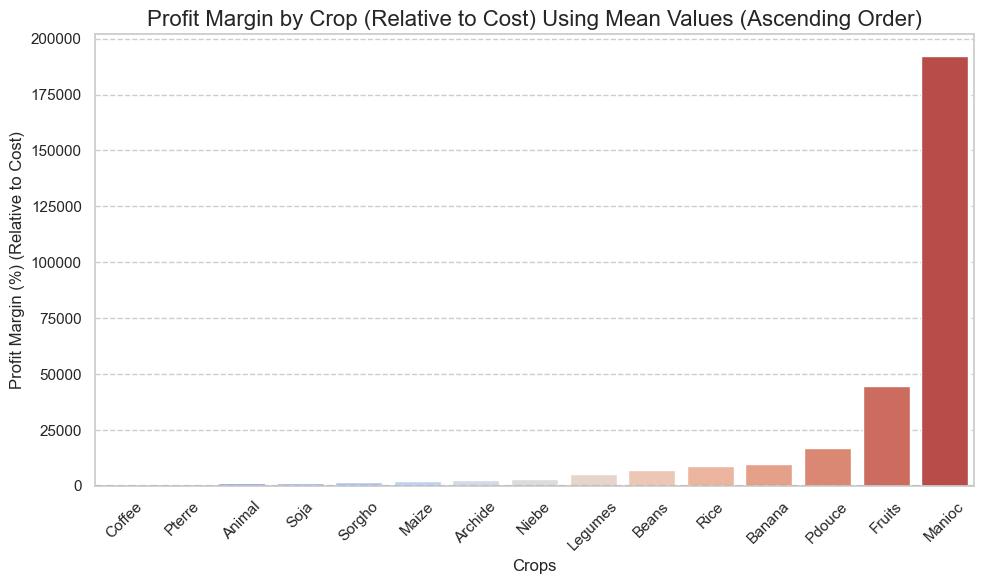

In [19]:
crop_columns = {
    'Coffee': ['R_Caffee', 'C_Coffee'],
    'Beans': ['R_haricot', 'C_beans'],
    'Maize': ['R_Mais', 'C_Mais'],
    'Rice': ['R_Riz', 'C_Riz'],
    'Niebe': ['R_Niebe', 'C_Niebe'],
    'Sorgho': ['R_Sorgh', 'C_Sorgh'],
    'Banana': ['RN_Banan', 'C_Banan'],
    'Soja': ['R_Soja', 'C_Soja'],
    'Animal': ['R_Anim', 'C_Anim'],
    'Fruits': ['R_Fruit', 'C_fruit'],
    'Pterre': ['R_Pterre', 'C_Pterre'],
    'Legumes': ['R_legume', 'C_legum'],
    'Pdouce': ['R_Pdouce', 'C_Pdouce'],
    'Manioc': ['R_Manioc', 'C_Manioc'],
    'Archide': ['R_Arachid', 'C_Arachid']
}

# Step 1: Calculate mean values for revenue, cost, and profit margin relative to cost
profit_data = []

for crop, (revenue_col, cost_col) in crop_columns.items():
    # Calculate mean revenue and cost for each crop
    mean_revenue = df[revenue_col].mean() if revenue_col in df.columns else 0
    mean_cost = df[cost_col].mean() if cost_col in df.columns else 0
    # Calculate net profit as the difference between mean revenue and cost
    net_profit = mean_revenue - mean_cost
    # Profit Margin as a percentage relative to the cost
    profit_margin = (net_profit / mean_cost) * 100 if mean_cost > 0 else net_profit  # Avoid division by zero
    
    profit_data.append({
        'Crop': crop,
        'Mean Revenue': mean_revenue,
        'Mean Cost': mean_cost,
        'Net Profit': net_profit,
        'Profit Margin (%) (relative to Cost)': profit_margin  # No string formatting here for calculation and plotting
    })

# Step 2: Create a DataFrame
profit_df = pd.DataFrame(profit_data)

# Step 3: Sort the DataFrame by Profit Margin relative to cost in ascending order
profit_df.sort_values(by='Profit Margin (%) (relative to Cost)', ascending=True, inplace=True)

# Step 4: Display the results in a formatted table with percentages for readability
profit_df['Profit Margin (%) (relative to Cost)'] = profit_df['Profit Margin (%) (relative to Cost)'].apply(lambda x: f"{x:.2f}%")

print(profit_df)

# Step 5: Plotting Profit Margins relative to cost (based on mean values)
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_df, x='Crop', y=profit_df['Profit Margin (%) (relative to Cost)'].str.rstrip('%').astype(float), palette='coolwarm')

# Adding plot details
plt.title('Profit Margin by Crop (Relative to Cost) Using Mean Values (Ascending Order)', fontsize=16)
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Profit Margin (%) (Relative to Cost)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')  # Add a line for zero profit margin
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()